# Using boostwrap for classification

In [1]:
# This is a hack to make graphviz work with the conda environment. Maybe you do not need it.
import os, sys
os.environ["PATH"] = os.path.dirname(sys.executable) + os.pathsep + os.environ["PATH"]

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn import model_selection

In [3]:
%matplotlib notebook

In [4]:
# Silencing some warning from scikit learn an numpy
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

In [5]:
from boostwrap import Classifier

## Example data preparation

In [6]:
from sklearn.datasets.samples_generator import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=5, n_features=5, cluster_std=2.)
# scatter plot, dots colored by class value
mydict = {'feature_{0}'.format(i): X[:, i] for i in range(5)}
mydict.update({'random_feature': np.random.random(X.shape[0])})
mydict.update({'label': y})
data = pd.DataFrame(mydict)

In [7]:
data.head()

feature_0  feature_1  feature_2  feature_3  feature_4  random_feature  \
0   8.280648   6.413921   3.323831   0.962537  -1.449794        0.383539   
1   7.065426   4.540204   1.454325   4.437033  -7.141033        0.850886   
2  10.754034  -1.612650  -3.600958   4.449085 -11.006390        0.223933   
3   8.586417   9.414933   0.182775   3.455694   2.454683        0.974853   
4   7.988399  -5.404354  -7.910537  -0.697465  -7.007629        0.860094   

   label  
0      3  
1      1  
2      1  
3      3  
4      0

In [8]:
features = ['feature_{0}'.format(i) for i in range(5)]
features += ['random_feature']
x_data = data[features]
y_data = data['label']

In [9]:
seed = 42
test_size = 0.3
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, 
                                                                    test_size=test_size, 
                                                                    random_state=seed)

In [10]:
type(x_train)

pandas.core.frame.DataFrame

## Classification

In [11]:
default_params = {'objective': 'multi:softprob', 'reg_lambda': 1, 'random_state': 0, 'n_jobs': 1, 
                  'scale_pos_weight': 1, 'subsample': 1, 'reg_alpha': 0, 'max_delta_step': 0, 
                  'min_child_weight': 1, 'n_estimators': 1000, 'learning_rate': 0.1, 
                  'colsample_bylevel': 1, 'gamma': 0, 'colsample_bytree': 1, 'booster': 'gbtree', 'max_depth': 3, 
                  'silent': True, 'seed': 0, 'base_score': 0.5}

In [12]:
myclassifier = Classifier(**default_params)
myclassifier.train(x_train, y_train)

In [13]:
myclassifier.score(x_test, y_test, method='matthews')

0.9874752771076833

In [14]:
myclassifier.score(x_test, y_test, method='accuracy')

0.99

<IPython.core.display.Javascript object>


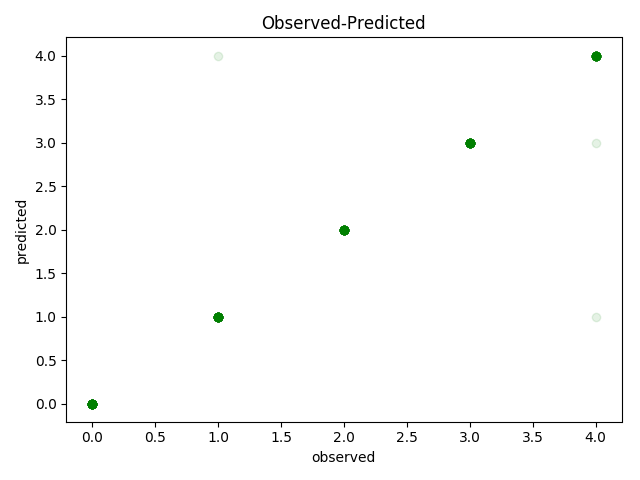

In [15]:
fig, ax = plt.subplots()
myclassifier.plot_scatter(x_test, y_test, ax=ax, alpha=0.1)
plt.show()

In [16]:
myclassifier.predict(x_data)

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 1, 3, 1, 4, 4, 1, 2, 4, 3, 2,
       2, 1, 2, 3, 2, 0, 0, 3, 4, 1, 2, 3, 2, 3, 1, 1, 3, 2, 1, 1, 0, 2,
       0, 1, 2, 4, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 4, 2, 3, 3, 1, 3, 4, 0,
       4, 4, 4, 3, 1, 4, 0, 2, 1, 2, 3, 0, 1, 0, 1, 1, 2, 3, 2, 2, 4, 3,
       3, 0, 2, 0, 3, 2, 0, 4, 0, 1, 0, 2, 4, 1, 3, 4, 1, 4, 1, 0, 3, 4,
       2, 1, 4, 2, 2, 1, 2, 2, 1, 4, 1, 2, 2, 4, 1, 0, 1, 0, 4, 3, 1, 0,
       2, 0, 0, 2, 0, 4, 0, 4, 0, 4, 4, 1, 4, 0, 2, 2, 2, 0, 0, 2, 3, 1,
       1, 1, 3, 2, 1, 0, 1, 2, 3, 2, 4, 1, 2, 1, 2, 0, 2, 3, 1, 1, 0, 0,
       3, 3, 1, 4, 4, 2, 1, 4, 1, 3, 1, 0, 3, 2, 3, 1, 3, 3, 3, 0, 4, 3,
       0, 1, 4, 2, 3, 0, 0, 0, 0, 3, 3, 4, 0, 4, 2, 0, 4, 3, 3, 0, 1, 1,
       3, 2, 3, 3, 4, 3, 1, 3, 2, 1, 0, 0, 4, 0, 0, 4, 4, 2, 4, 2, 0, 3,
       2, 3, 2, 1, 3, 2, 0, 2, 1, 0, 1, 1, 3, 4, 3, 2, 4, 0, 2, 4, 2, 1,
       4, 4, 0, 3, 1, 2, 1, 4, 4, 1, 2, 3, 2, 0, 2, 1, 1, 0, 4, 4, 0, 0,
       3, 4, 3, 4, 1, 2, 2, 4, 2, 0, 2, 4, 2, 2, 3,

In [16]:
myclassifier.predict_proba(x_data)

array([[2.6275302e-04, 2.0895363e-04, 3.2317880e-04, 9.9876773e-01,
        4.3738016e-04],
       [2.9176407e-04, 9.9398476e-01, 3.3010796e-04, 1.3751638e-03,
        4.0182429e-03],
       [1.1155347e-03, 9.9541712e-01, 1.2621379e-03, 1.3367938e-03,
        8.6847076e-04],
       ...,
       [9.9033153e-01, 7.6454007e-03, 2.6415032e-04, 6.2116669e-05,
        1.6968072e-03],
       [9.9875653e-01, 9.7907265e-05, 6.7813369e-04, 1.3605217e-04,
        3.3136891e-04],
       [8.9479354e-06, 2.0005309e-05, 4.1151529e-06, 6.4631504e-06,
        9.9996042e-01]], dtype=float32)

<IPython.core.display.Javascript object>


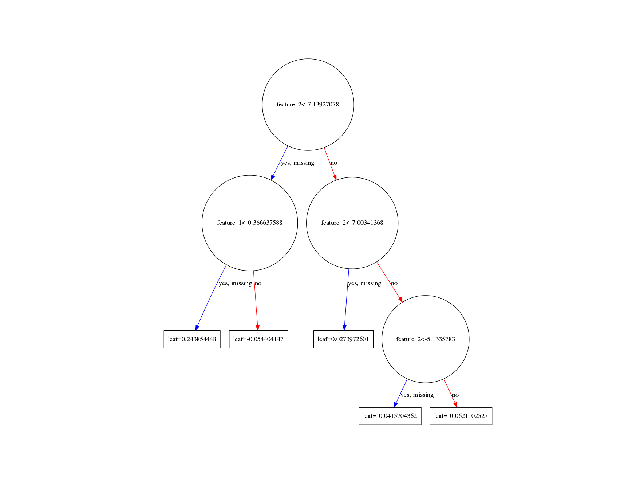

In [17]:
fig, ax = plt.subplots()
myclassifier.plot_example_tree(ax)
plt.show()

In [19]:
# get estimators
trees = list(myclassifier.get_estimators())
trees[:5]

['0:[feature_0<7.52721119] yes=1,no=2,missing=1,gain=275.993713,cover=224.000015\n\t1:[feature_1<7.07663822] yes=3,no=4,missing=3,gain=31.5314808,cover=180.160019\n\t\t3:[feature_0<7.24575758] yes=7,no=8,missing=7,gain=0.411718518,cover=176.320007\n\t\t\t7:leaf=-0.0621430166,cover=174.080017\n\t\t\t8:leaf=-0.0123456782,cover=2.24000025\n\t\t4:leaf=0.198347107,cover=3.84000015\n\t2:[feature_3<-3.62149358] yes=5,no=6,missing=5,gain=27.6178627,cover=43.840004\n\t\t5:leaf=0.243996143,cover=40.6400032\n\t\t6:leaf=-0.0476190448,cover=3.20000029\n',
 '0:[feature_0<-6.0241785] yes=1,no=2,missing=1,gain=263.318756,cover=224.000015\n\t1:[feature_2<-0.991977453] yes=3,no=4,missing=3,gain=65.5771484,cover=51.5200043\n\t\t3:leaf=0.244343877,cover=43.2000046\n\t\t4:leaf=-0.0557939894,cover=8.32000065\n\t2:[feature_2<-9.30643654] yes=5,no=6,missing=5,gain=2.40882468,cover=172.480011\n\t\t5:[feature_0<8.49564171] yes=7,no=8,missing=7,gain=2.58615232,cover=3.52000022\n\t\t\t7:leaf=0.0964912251,cover=1.

<IPython.core.display.Javascript object>


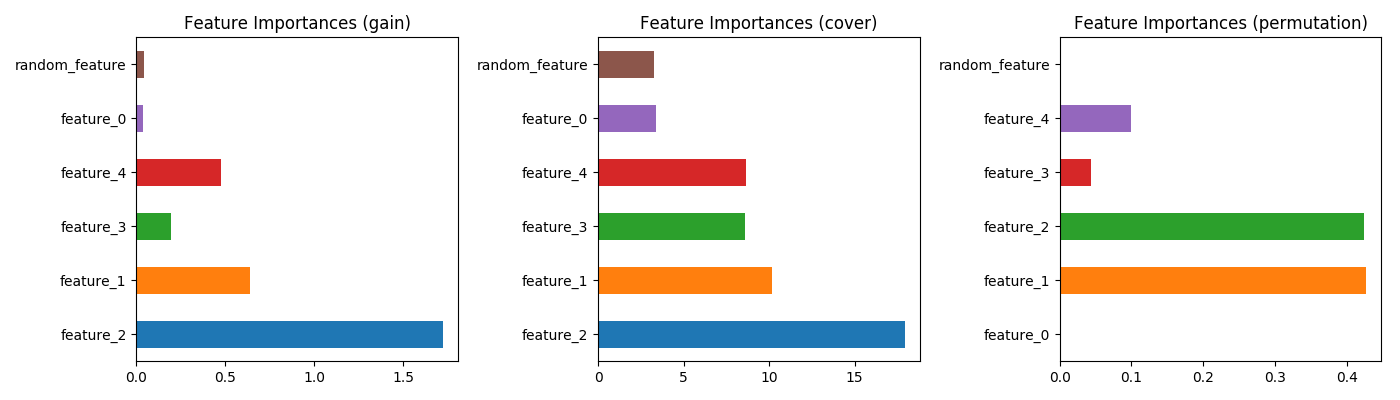

In [18]:
importance = myclassifier.get_importance()
fig, axes = plt.subplots(1, 3, figsize=(14,4))
importance['gain'].plot(axes[0], std=False)
importance['cover'].plot(axes[1], std=False)
importance['permutation'].plot(axes[2], std=False)
plt.show()

<IPython.core.display.Javascript object>


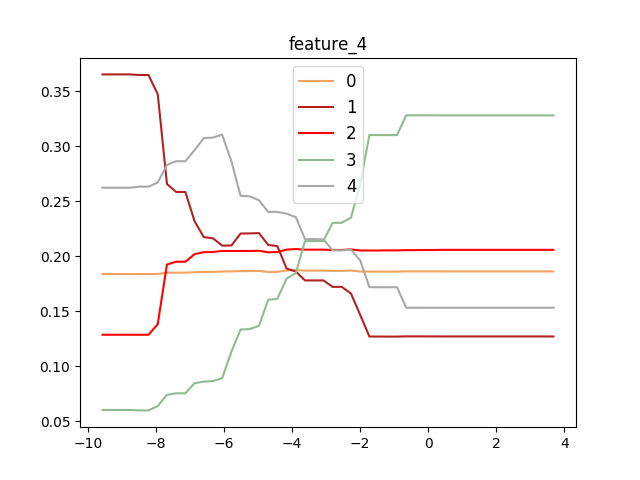

In [19]:
partial_dependence = myclassifier.get_partial_dependence(['feature_4'])

fig, axes = plt.subplots()
partial_dependence['feature_4'].plot(axes)
plt.show()

<IPython.core.display.Javascript object>


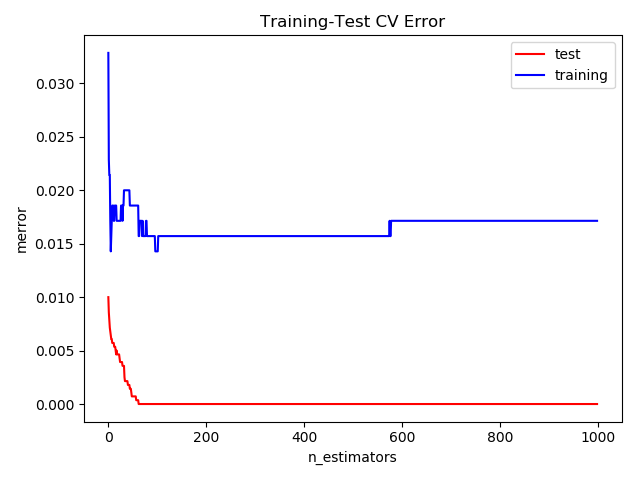

In [22]:
# run many cross validations
cv = myclassifier.cv()
# plot the outcome
fig, axes = plt.subplots()
cv.plot(axes)
plt.show()

<IPython.core.display.Javascript object>


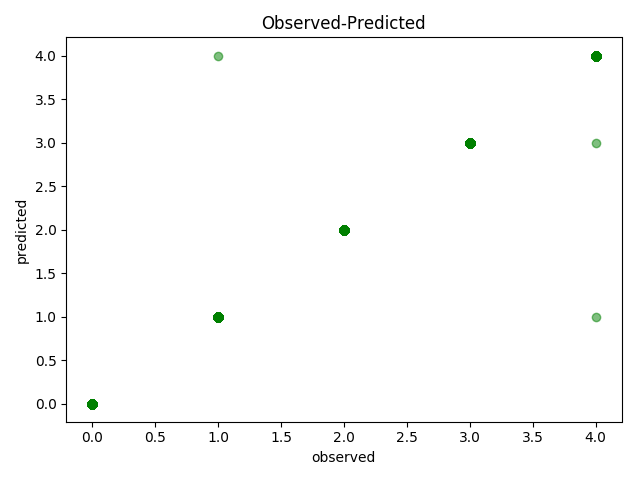

In [20]:
fig, axes = plt.subplots()
myclassifier.plot_scatter(x_data, y_data, axes, alpha=0.5)
plt.show()